<a href="https://colab.research.google.com/github/aakashpandey1507/erp/blob/main/std_for_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt

# Inputs

In [60]:
# Tell me these data

ticker = "^SPX"
period = 1
intervals = "1d"

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*period)

In [61]:
df = yf.download(ticker, start=start_date, end=end_date, interval=intervals)

[*********************100%***********************]  1 of 1 completed


In [62]:
df = df.reset_index()


In [63]:
# prompt: # prompt: clean the columnd  	Close	High	Low	Open	Volume
# # Ticker			^SPX	^SPX	^SPX	^SPX	^SPX

# Rename the columns to remove the multi-level index and clean up names
df.columns = ['Date'] + [f'{col[1]}_{col[0]}'.strip() for col in df.columns[1:]]

# Remove leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

In [64]:
df = df.rename(columns={'^SPX_Close': 'Price'})
df = df.rename(columns={'^SPX_High': 'High'})
df = df.rename(columns={'^SPX_Low': 'Low'})
df = df.rename(columns={'^SPX_Open': 'Open'})
df = df.rename(columns={'^SPX_Volume': 'Volume'})
df = df[["Date", "Price"]]
df['Daily Return'] = df['Price'].pct_change()
df

,Date,Price,Daily Return
0,2024-06-05,5354.029785,NaN
1,2024-06-06,5352.959961,-0.000200
2,2024-06-07,5346.990234,-0.001115
3,2024-06-10,5360.790039,0.002581
4,2024-06-11,5375.319824,0.002710
...,...,...,...
245,2025-05-29,5912.169922,0.004011
246,2025-05-30,5911.689941,-0.000081
247,2025-06-02,5935.939941,0.004102
248,2025-06-03,5970.370117,0.005800


In [65]:
df.isnull().sum()

,0
Date,0
Price,0
Daily Return,1


In [66]:
df = df.dropna()

In [67]:
df

,Date,Price,Daily Return
1,2024-06-06,5352.959961,-0.000200
2,2024-06-07,5346.990234,-0.001115
3,2024-06-10,5360.790039,0.002581
4,2024-06-11,5375.319824,0.002710
5,2024-06-12,5421.029785,0.008504
...,...,...,...
245,2025-05-29,5912.169922,0.004011
246,2025-05-30,5911.689941,-0.000081
247,2025-06-02,5935.939941,0.004102
248,2025-06-03,5970.370117,0.005800


from matplotlib import pyplot as plt
df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Daily Return'].plot(kind='hist', bins=20, title='Daily Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price', y='Daily Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Daily Return']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Daily Return')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Daily Return'].plot(kind='line', figsize=(8, 4), title='Daily Return')
plt.gca().spines[['top', 'right']].set_visible(False)

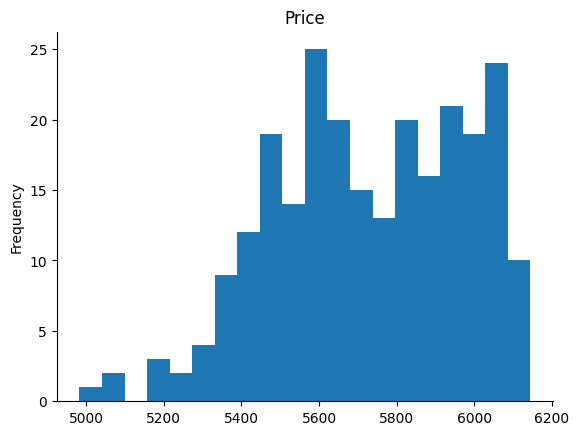

In [73]:
from matplotlib import pyplot as plt
df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

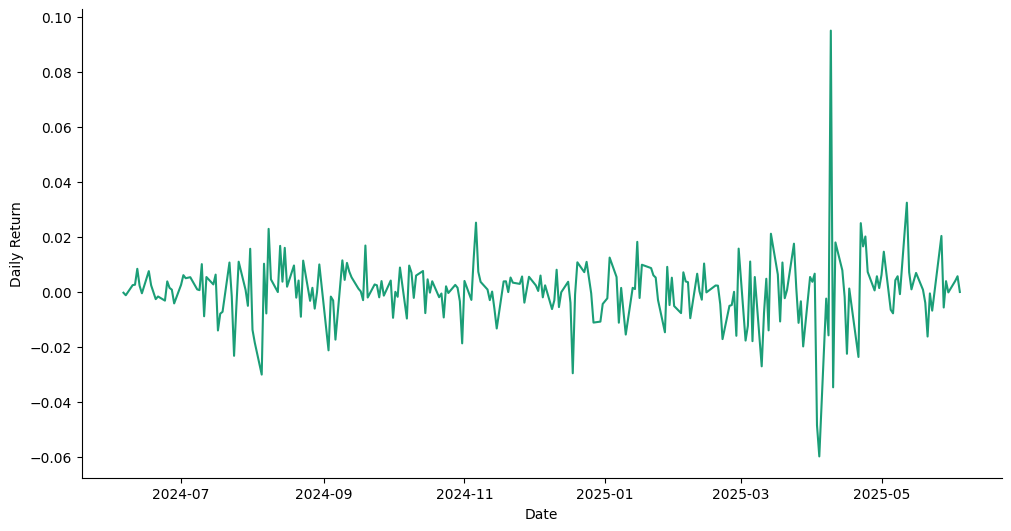

In [72]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Daily Return']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Daily Return')

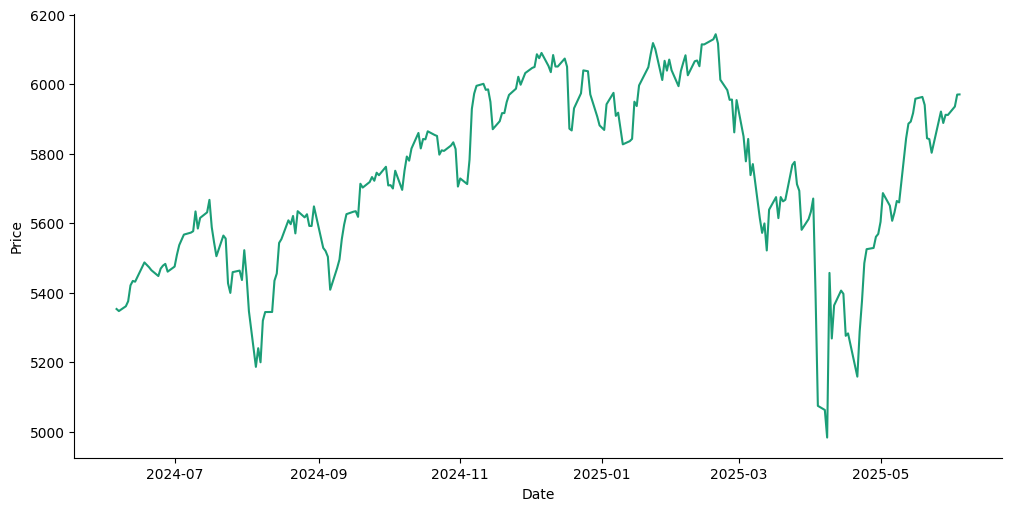

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

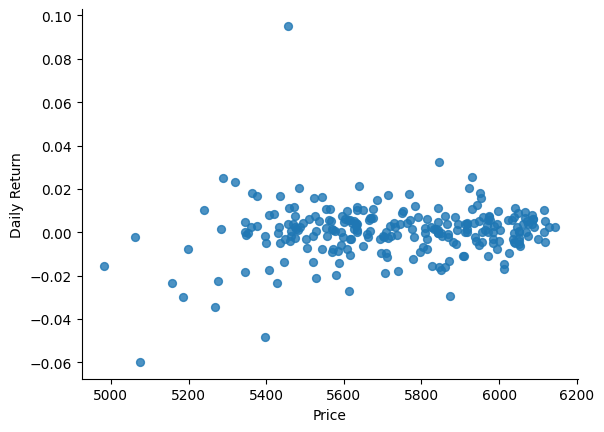

In [69]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price', y='Daily Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [68]:
daily_std_dev = df['Daily Return'].std()

annualized_std_dev = (daily_std_dev * np.sqrt(252))*100

print(f"Annualized Standard Deviation: {annualized_std_dev:.4f}")


Annualized Standard Deviation: 19.8036
